<a href="https://colab.research.google.com/github/jaewoo-cho/jaewoo/blob/master/43_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 Convolution

In [ ]:
# '합성곱(Convolution)' 은 입력데이터에서 유용한 특성(feature)만
# 드러나게 하기 위한 것으로 비유할수 있다.

In [ ]:
# Dense layer(밀집층) 에선
# - 뉴런 마다 '모든 입력'에 가중치를 '곱' 하여 받는다.
# - 가중치(weight) 는 훈련 최초에는 랜덤하게 초기화.
# - 출력은 뉴런의 개수만큼의 출력.

In [ ]:
# 합성곱은 입력데이터 '전체' 에 가중치를 적용하는 것이 아니라
#  '일부' 에 가중치를 적용(곱) 하는 겁니다

In [ ]:
# 입력의 '일부'에 가중치 적용하여 '1개의 출력' 만든다
# 그리고! 한칸 이동하여 적용한뒤 새로운 출력 만든다

In [ ]:
# 첫번째 합성곱에 사용된 가중치 w1~w3 와 절편 b 가 두번째 합성곱에도 동일하게 사용
# 이렇게 '한칸씩 이동' 하면서 출력을 만드는 것이 '합성곱'
#
#   10개의 입력 x  뉴런의 가중치가 3개  => 8개의 출력(8번의 계산)

In [ ]:
# 동일한 뉴런을 사용하여 8번의 계산을 통해 8개의 출력을 만든다!

# [비교]
# 밀집층의 뉴런 : 10개의 weight 를 가지고 1개의 출력 만듬
# 합성곱층의 뉴런 : 3개의 weight 를 가지고 8개의 출력 만듬.

# 합성곱층 뉴런의 weight 개수는 정해줄수 있다 (하이퍼 파라미터다!)

## CNN 의 필터(filter) 혹은 커널(kernel)

In [ ]:
# 합성곱 신경망(CNN) 에선
#  뉴런이 '이동' 하면서 출력을 만들기 때문에
#  뉴런을 'filter(필터)' 혹은 'kernel(커널)' 이라 부른다
#
#  ♣ 뉴런 = 필터 = 커널 <= CNN 에선 모두 같은 말이라고 생각해도 무방함

In [ ]:
# ※ keras API 에선
#   '뉴런 개수' 를 이야기 할 때는 '필터' 라 부르고
#   '가중치' 를 의미할 때는 '커널' 이라고 부르곤 합니다
#   (그러나, 혼용되어 쓰임...)

## 2차원 입력 & 필터 & 출력

In [ ]:
# 합성곱의 장점은 1차원뿐 아니라 2차원 입력에도 적용할수 있다는 점이다! ↓↓

![](https://upload.wikimedia.org/wikipedia/commons/9/90/CNN-filter-animation-1.gif?20230201202141)


In [ ]:
# 입력이 2차원 배열이면 '필터'도 2차원 이어야 한다
# 필터의 커널 크기는 정하기 나름 (하이퍼 파라미터!)

# 입력 x 커널 의 합성곱후 1개의 출력 만든다 (여기에 bias 도 더해진다)
# 좌 → 우,  상 → 하 로 필터 이동해가며 합성곱 수행.

In [ ]:
# 예시]
# 입력 (4,4), 커널 (3,3) -> 출력? (2,2)

## 특성 맵 (feature map)

In [ ]:
# 출력의 shape 는?
# 4개의 '출력'을 필터가 입력에 놓인 위치에 맞게 '2차원'으로 배치
#  출력: (2, 2)  ← 출력도 2차원이다.

# 입력 (5,5)  필터 (3,3) => 합성곱 출력 (3, 3)   <- 합성곱 출력도 2차원이다!
# 입력 (5,5)  필터 (4,4) => 합성곱 출력 (2, 2)   <- 마치 압축된 느낌!

# 출력을 2차원으로 표현하니 (4, 4) 크기의 입력이 (2, 2) 크기로 압축되었다!
# 합성곱 계산을 통해 얻은 출력을 '특성 맵 (feature map)' 이라 한다.

## 합성곱층의 출력

In [ ]:
# 밀집층에서 여러개의 뉴런을 사용했듯이 합성곱 층에서도 '여러개의 필터' 를 사용 가능!
#  여러개의 필터를 사용하면 만들어진 '특성 맵'은 순서대로 차곡 차곡 쌓임
#  가령, (2, 2)크기의 특성맵을 쌓으면 -> 3차원 배열이 됨.
#  즉, '3개의 필터를 사용하면' (2, 2, 3) 크기의 3차원 배열이 됩

![](https://miro.medium.com/v2/resize:fit:1400/1*GPBRUVqDhQxDuW8r6X5n7g.png)
![](https://blog.kakaocdn.net/dn/Bbqhy/btruWkuBu46/j0uQ7kHhe5Y3YBzwLXj31K/img.png)


![](https://velog.velcdn.com/images/groovallstar/post/fd8d0bdc-5c0e-46cd-8c04-dba32a727a9e/image.gif)


In [ ]:
# 입력(4, 4)
# 필터 (3, 3) x 1개 -> (2, 2, 1)

# 필터 (3, 3) X 3개 -> (2, 2, 3)

In [ ]:
# '합성곱' 의 실제 계산은 밀집층과 동일하게 단순히 '입력' 과 '가중치' 를 곱하는 것이지만,
# 2차원 형태를 유지하는 점이 다르다

# 입력보다 훨씬 작은 크기의 커널을 사용하여 2차원 '특성맵(들)' 을 만들어 낸다.
# 2차원 구조를 그대로 사용하기 때문에 합성곱 신경망이 이미지 처리 분야에서
# 뛰어난 성능을 발휘

# 데이터 준비

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow import keras

import random
def set_seed(seed = 42):
  tf.keras.utils.set_random_seed(seed)
  tf.config.experimental.enable_op_determinism()

set_seed(42)


In [ ]:
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

# CNN 에서의 입력은 (batch, height, width, channel) 형태이어야 한다.
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_scaled.shape, val_scaled.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

# Conv2D
- keras 의 2D 합성곱 층

**tf.keras.layers.Conv2D()**

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

```python
tf.keras.layers.Conv2D(
    filters, # 필터의 개수  (*필수)
    kernel_size, # 필터에 사용할 커널의 크기 (*필수)
    strides=(1, 1), # 필터 이동 크기
    padding='valid',  # 패딩 적용 방법 valid 혹은 same
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None, # 활성화 함수 (기본값: None)
    use_bias=True,
    kernel_initializer='glorot_uniform',    
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
```


## filters=, kernel_size=

In [ ]:
keras.layers.Conv2D(filters=10, kernel_size=(3,3), activation='relu')

# filters= : 필터의 개수  (*필수)
# kernel_size = : 필터에 사용할 커널의 크기 (*필수)
# activation= : 활성화 함수 (기본값: None)

<Conv2D name=conv2d, built=False>

In [ ]:
# Conv2D가 출력한 특성맵은 활성화 함수까지 적용한 후 의 결과

In [ ]:
# 적절한 커널의 크기 (kernel_size=)는?
# - 커널의 크기는 하이퍼 파라미터!
# - 보통(3, 3) 이나 (5,5) 크기가 권장
# - 여러 값을 시도해봐야 함.

In [ ]:
# CNN 합성곱 신경망이란?
# 일반적으로 1개 이상의 합성곡 층을 사용한 인공신경망을 칭함

In [ ]:
# 입력 (6, 6) -> 위의 Conv2D -> (4, 4, 10)

## padding=

![](https://miro.medium.com/max/790/1*1okwhewf5KCtIPaFib4XaA.gif)    
![](https://velog.velcdn.com/images%2Fiissaacc%2Fpost%2F443d5ae0-b4b6-4203-a0bb-ed2607fe7956%2FconvSobel.gif)

![](https://miro.medium.com/max/666/1*noYcUAa_P8nRilg3Lt_nuA.png)
![](https://miro.medium.com/max/1300/1*sKTqxILUPNI6P8t-bBIE1w.png)


In [ ]:
# 입력(4,4) x 커널 (3,3) => 출력(2,2)

# 만약, 커널 (3,3) 그대로 두고 출력의 크기를 입력과 동일하게 (4,4)로 만들려면?
# => 더 큰 입력에 합성곱 하는 척(?) 해야 함.

In [ ]:
# ex) 가령 (4,4) 입력에 패딩을 주어 (6,6) 입력인것처럼 하면
#  입력(6,6) x 커널(3,3) => 출력 (4,4)

In [ ]:
# 입력배열 주위를 가상의 원소로 채우는 것을 '패딩(padding)'
# 패딩의 역할은 순전히 커널이 이동하며 출력하는 횟수를 늘려주는 것밖에 없다.
# 실제 입력값이 아니기 때문에 패딩은 '0' 으로 채우기에 계산에 영향을 주지 않는다

- same padding :
  - '입력'과 '특성맵의 크기'를 '동일'하게 만들기 위해 입력 주위를 0으로 패딩하는 것
  - 합성곱 신경망에서 많이 사용되는 방식
- valid padding (keras 디폴트)
  - 패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 것.
  - '입력' 에 비해 '특성맵의 크기' 는 줄어들수밖에 없다


### 패딩을 사용하는 이유

In [ ]:
# 적절한 패딩을 통해 이미지의 주변에 있는 정보가 소홀히 다루어 지지 않도록 도와줍니다.
# 일반적인 합성곱 신경망에서는 same padding 이 많이 사용.

In [ ]:
# 예시
keras.layers.Conv2D(10, (3, 3), activation='relu', padding='same')

<Conv2D name=conv2d_1, built=False>

## strides=
이동의 크기

![](https://upload.wikimedia.org/wikipedia/commons/b/b9/Convolution_arithmetic_-_No_padding_strides.gif)    

![](https://www.researchgate.net/publication/350386951/figure/fig13/AS:1132448477913121@1647008165630/Schematic-of-2D-CNN-for-stride-1-and-stride-2-with-zero-padding-adding-additional-layers.jpg)


In [ ]:
# 합성곱 연산이 한 칸씩 이동할때보다 두칸씩 이동하면
# 만들어지는 특성맵의 크기 (출력의 크기)는 더 작아진다!

# 이러한 이동의 크기를 stride 라 한다.
# strides=1  (기본값)

In [ ]:
# 예시
keras.layers.Conv2D(10, 3, activation='relu', padding='same', strides=(1,1)) # strides=1과 동일


<Conv2D name=conv2d_2, built=False>

In [ ]:
# 일반적으로 strides= 값은
#   가로, 세로 방향을 다르게 지정하는 경우는 거의 없다
#   1보다 큰 값을 사용하는 경우도 드물다
#   대체로 기본값을 그대로 사용함.

In [ ]:
# 사실 중요한건
# '입력크기', '패딩크기', '스트라이드 크기', '커널 크기' 가 주어졌을때
# 과연 출력의 크기가 어떻게 될지 예측할수 있어야 한다

- stride 와 padding 조합 예

![](https://miro.medium.com/max/640/1*YvlCSNzDEBGEWkZWNffPvw.gif)
![](https://miro.medium.com/max/640/1*gXAcHnbTxmPb8KjSryki-g.gif)
![](https://miro.medium.com/max/640/1*34_365CJB5seboQDUrbI5A.gif)
![](https://miro.medium.com/max/640/1*WpOcRWlofm0Z0EDUTKefzg.gif)


# Pooling (풀링)
- MaxPooling2D
- AveragePooling2D


In [ ]:
# 풀링 (pooling) 은
#    합성곱 층에서 만든 특성 맵의 가로 세로 크기를 줄이는 역할
#    '중요한 것'만 추출!  (정보를 압축!)
#    그러나, '특성맵의 개수'는 줄이지 않습니다.★

#  ex) 특성맵 (2, 2, 3) → 풀링(2,2) -> 출력 (1, 1, 3)

# 풀링 층의 출력도 특성 맵 (feature map) 이라 불린다.
# 풀링 층에는 가중치가 없다.

![](https://nico-curti.github.io/NumPyNet/NumPyNet/images/maxpool.gif)


- Max pool 과 stride 예
![](https://miro.medium.com/max/640/1*kW4HcS4zFxoKv6R4xtqFlg.gif)
![](https://miro.medium.com/max/640/1*LjXV6eQKTQcg-PJnBRE0VA.gif)


### Max pooling

**tf.keras.layers.MaxPool2D**

https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D

```python
tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
    **kwargs
)
```
- strides 값이 None 으로 주어지면 pool_size 와 동일한 크기로 stride 한다


In [ ]:
# 예시
keras.layers.MaxPooling2D(pool_size=2)

# 첫번째 매개변수 pool_size= 는 풀링의 크기를 지정
#  대부분 풀링의 크기는 2 입니다.  즉 가로세로 크기를 절반으로 줄입니다.
# pool_size=(2,2) 와 동일
# 걍 MaxPooling2D(2) 해도 됨.

# 가로 세로 크기를 다르게 지정도 가능
#   ex) (2, 3)  <- 그러나 이런 경우는 극히 드뭅니다.

<MaxPooling2D name=max_pooling2d, built=True>

In [ ]:
# strides= 와 padding= 매개변수도 제공함
# strides= 의 기본값은 자동으로 풀링의 크기. (이 경우 따로 지정할 필요 없슴)
# padding= 의 기본값은 'valid' 로  따로 패딩을 하진 않습니다.
#     풀링은 패딩을 하지 않기 때문에 이 매개변수를 바꾸는 경우는 거의 없습니다.

### Average Pooling

평균 풀링

**tf.keras.layers.AveragePooling2D**

https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D

```python
tf.keras.layers.AveragePooling2D(
    pool_size,
    strides=None,
    padding='valid',
    data_format=None,
    name=None,
    **kwargs
)
```


In [ ]:
# 최댓값 대신 평균을 계산하는 평균풀링.
# 나머지 동작및 매개변수는 MaxPooling2D 와 동일

# 그러나, 많은 경우 평균 풀링보다 최대 풀링을 많이 사용합니다.
# 왜냐하면, 평균 풀링은 특성 맵에 있는 중요한 정보를 (평균하여) 희석 시킬 수 있기 때문입니다.

# 합성곱 신경망의 전체 구조

In [ ]:
# 합성곱 신경망은 일전의 DNN 에서 처럼 일렬로 늘어선 뉴런으로 표현하여 그리기 힘듭니다.
# 합성곱 신경망의 '입력' 은 일반적으로 '너비 와 높이' 가 있는 이미지 이기 때문에 조금 입체적으로 그려보겠습니다.

## Feature Extraction & Classification

![](https://velog.velcdn.com/images/seongguk/post/35c2c439-1f96-4675-8963-3d0383d81ff8/%EC%BA%A1%EC%B2%98.JPG)

![](https://itwiki.kr/images/thumb/f/f3/CNN.jpeg/900px-CNN.jpeg)


# 이미지를 사용한 합성곱
channel

In [ ]:
# Channel 차원

# FashionMNIST 는 흑백 이미지라 2차원으로 표현 가능하지만
#  컬러이미지는 RGB채널이 있으니 3차원으로 표현된다.

# 가령 입력이 (4,4) 가 아니라 (4,4,3) 이 된다.  <- 마지막 3 이 채널차원 크기
# 이경우 합성곱은 어케 수행될까?

## 필터도 채널차원 갖고 있다

In [ ]:
# 색상차원이 있는 입력에서 합성곱을 수행하기 위해서는
# 필터도 가로, 세로 뿐 아니라 채널 차원도 필요
#  (편의상 채널 차원을 '깊이' 라고 부르겠습니다)

# 즉! 필터의 크기가 (3,3) 이 아니라 (3,3,3) 이 된다.

![](https://blog.kakaocdn.net/dn/Bbqhy/btruWkuBu46/j0uQ7kHhe5Y3YBzwLXj31K/img.png)


In [ ]:
# 입력 (10, 10, 3)
# 필터 (3, 3, 3) x 5개
# 합성곱결과출력 (8, 8, 5)

# 입력 (8, 8, 5)
# 필터 (3, 3, 5) x 10개
# 합성곱결과출력 (6, 6, 10)

## 합성곱층에는 3차원으로 전달하기!

In [ ]:
# keras 의 합성곱 층은 항상 이렇게 3차원 입력을 기대합니다.
# 만약 패션 MNIST 데이터처럼 graysacle 이미지일 경우에는 깊이 차원이 1인 3차원 배열로 변환하여 전달해야 합니다

#   (height, width) -> (height, width, channel) 형태로 변환!

#  ex) (28, 28) 크기의 2차원 배열을 (28, 28, 1) 크기의 3차원 배열로 변환

## 합성곱 층이 다시 올 때

In [ ]:
# 합성곱 - 플링층 다음에 다시 다시 합성곱층이 올 수 있다

예시) (6, 6, 3) 크기 입력과 (3, 3, 3) 크기 커널의 합성곱
![](https://miro.medium.com/v2/resize:fit:1400/1*i5gQ2mvE2rQQawQJIsEvng.png)


In [ ]:
"""
합성곱 신경망에서 필터는 이미지에 있는 '어떤 특징'을 찾는다고 생각할 수 있습니다
처음에는 간단하고 기본적인 특징 (직선, 곡선) 등을 찾고,
층이 깊어질수록 다양하고 구체적인 특징을 감지할 수 있도록 필터의 개수를 늘립니다.
즉, 어떤 특징이 이미지의 어느 위치에 놓이더라도 쉽게 감지할 수 있도록 너비와 높이 차원을 점점 줄여가는 거죠
"""
None

# 합성곱 신경망 만들기

In [ ]:
# 각 layer 의
#  - 입,출력 shape
#  - 모델 파라미터 개수 <- 이 모델을 제대로 파악하고 있는지의 척도중 하나

In [ ]:
model = keras.Sequential()

# 1.Feature Extraction

# 입력차원 지정 (height, width, channel)
model.add(keras.layers.Input(shape=(28, 28, 1))) # (height, width, channel)

# ① Conv2D: 32개의 필터, 커널크기 (3,3), same padding 사용, 활성화 함수 는 relu
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
# Q] 출력 shape 는 어케 되나? -> (28, 28, 32)
# Q] 모델 파라미터 개수는 -> (3 x 3 x 1 + 1(bias)) x 32개 -> 320개


# ② MaxPooling2D : 풀링크기 (2, 2)
model.add(keras.layers.MaxPooling2D(pool_size=2))
# Q] 출력 shape 는 어케 되나? -> (14, 14, 32)

# ③ Conv2D : 두번째 합성곱. 64개의 필터의 개수.  나머지는 동일.
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
# Q] 출력 shape 는 어케 되나? -> (14, 14, 64)
# Q] 모델 파라미터 개수는 -> (3 x 3 x 32 + 1(bias)) x 64개 -> 18496

model.add(keras.layers.MaxPooling2D(pool_size=2))
# Q] 출력 shape 는 어케 되나? -> (7, 7, 64)

# 2. Classification
model.add(keras.layers.Flatten())
# Q] 출력 shape 는 어케 되나? -> (3136,) 3136 = 7x7x64

# hidden layer 추가
model.add(keras.layers.Dense(100, activation='relu'))
# Q] 출력 shape 는 어케 되나? -> (100,)
# Q] 모델 파라미터 개수는 -> (3136 + 1(bias)) x 100 = 313700

model.add(keras.layers.Dropout(0.4))
# Q] 출력 shape 는 어케 되나? -> (100,)

model.add(keras.layers.Dense(10, activation='softmax'))
# Q] 출력 shape 는 어케 되나? -> (10,)
# Q] 모델 파라미터 개수는 -> (100 +1(biase)) x 10 = 1010

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

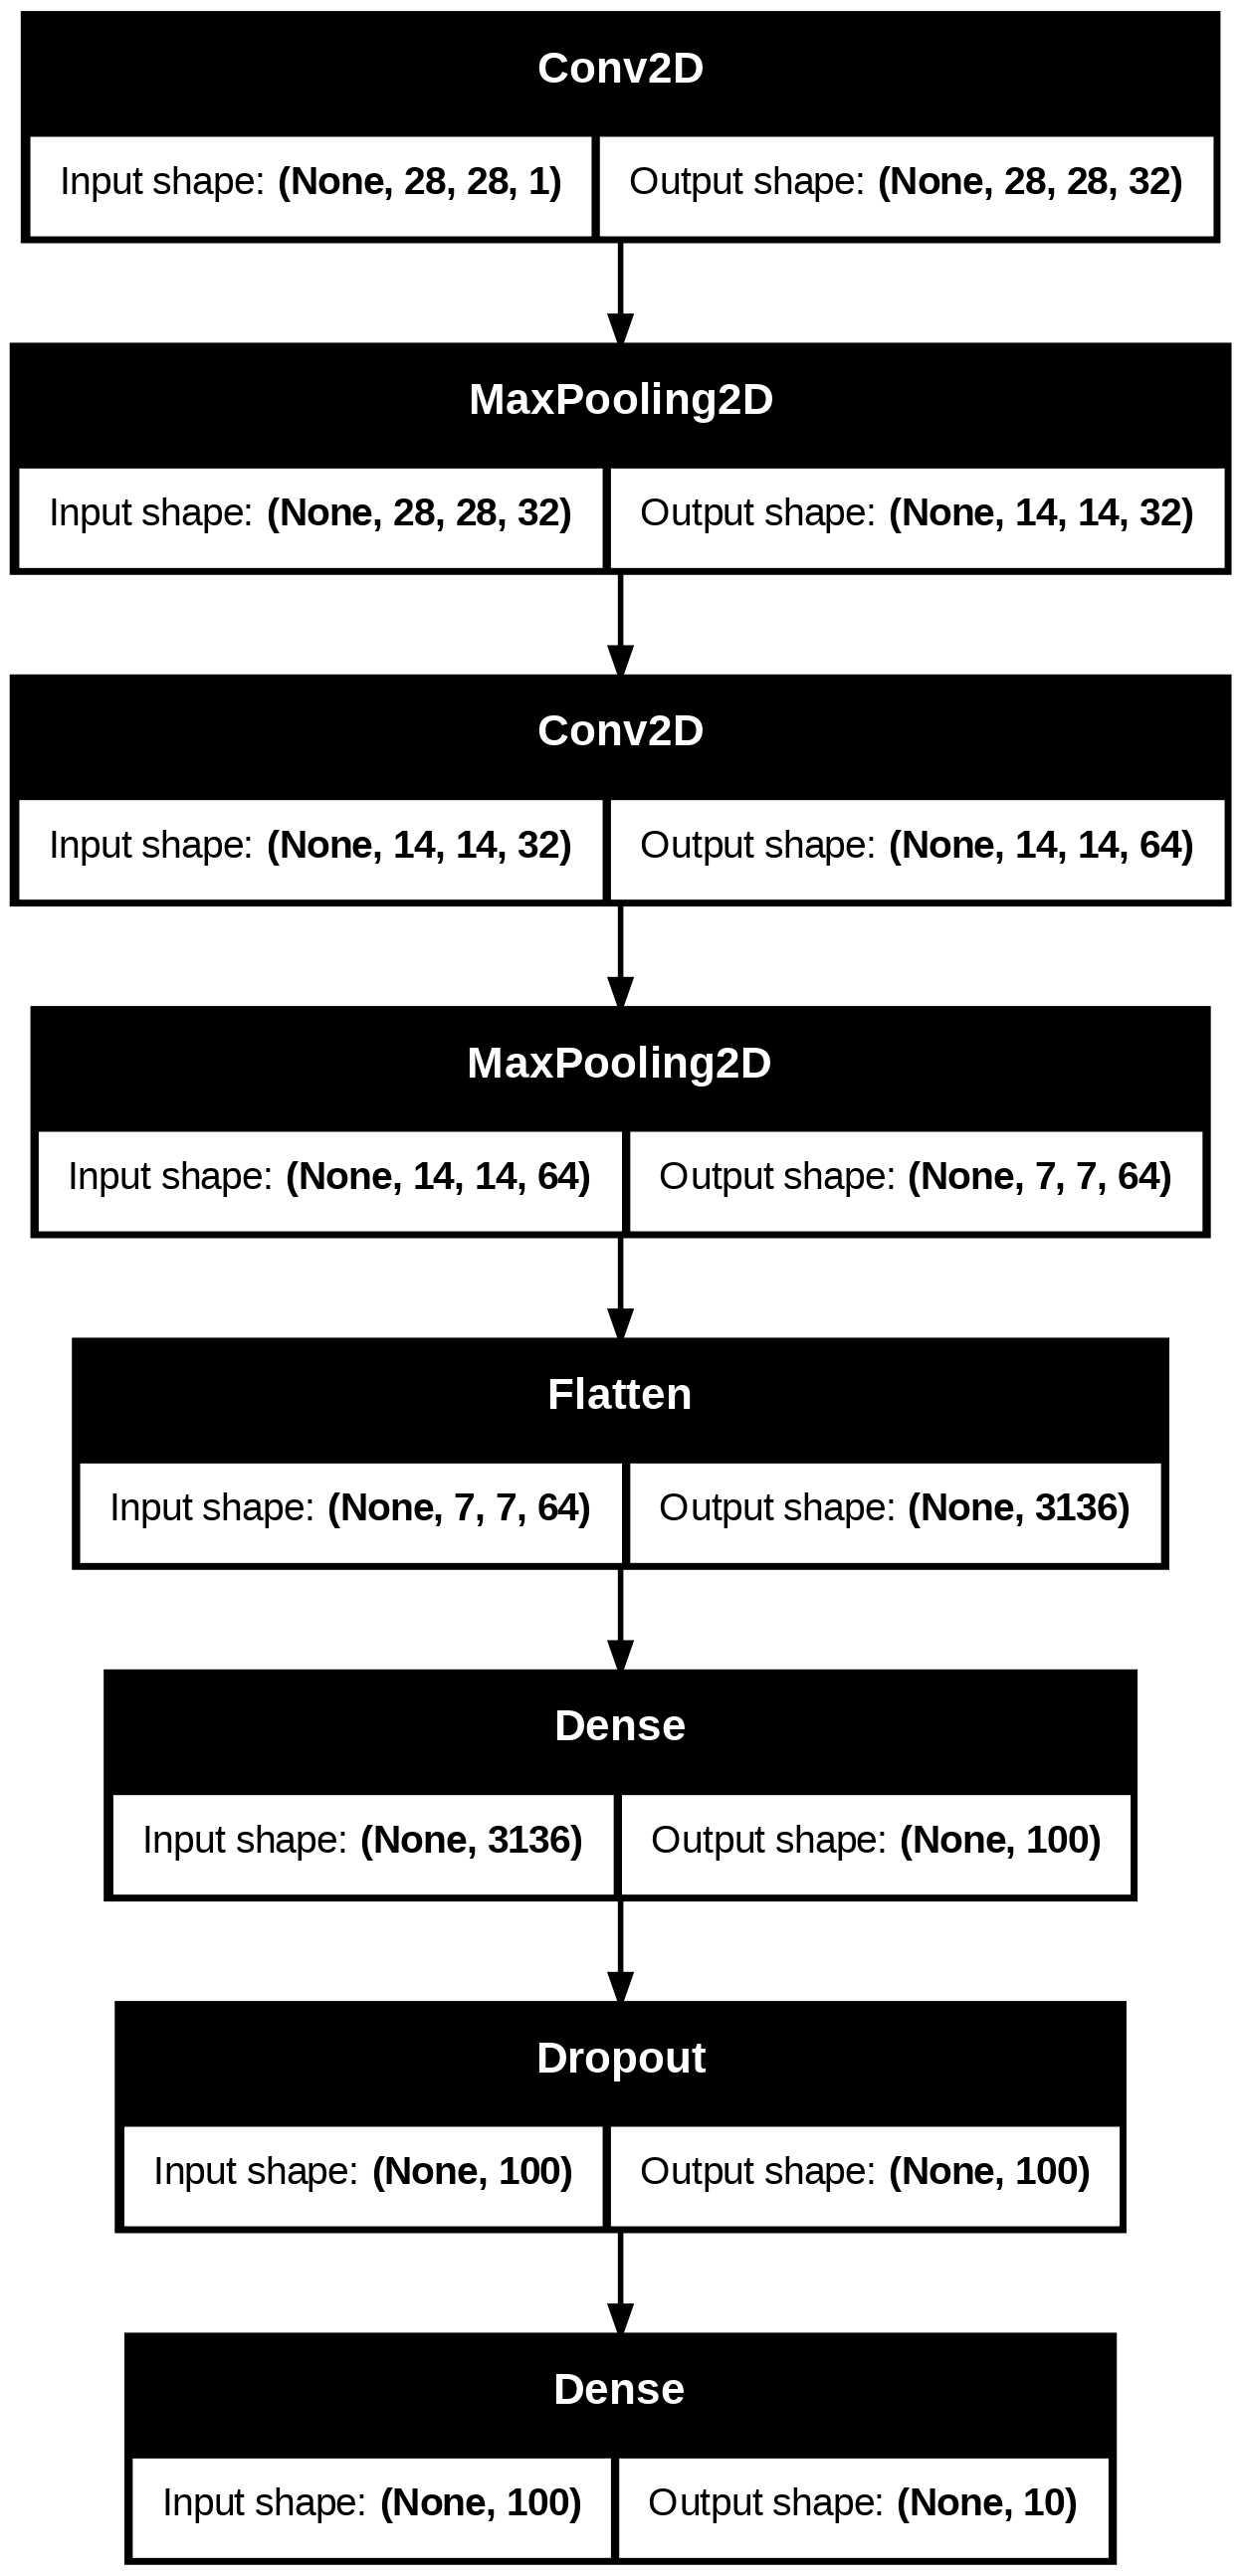

In [ ]:
# keras 에서 layer 구성을 시각화.
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=200)

# 모델 컴파일과 훈련

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb]
                    )

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7384 - loss: 0.7267 - val_accuracy: 0.8812 - val_loss: 0.3255
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.8697 - loss: 0.3688 - val_accuracy: 0.8990 - val_loss: 0.2732
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8884 - loss: 0.3114 - val_accuracy: 0.9015 - val_loss: 0.2595
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8992 - loss: 0.2799 - val_accuracy: 0.9114 - val_loss: 0.2411
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9081 - loss: 0.2525 - val_accuracy: 0.9133 - val_loss: 0.2345
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9149 - loss: 0.2291 - val_accuracy: 0.9138 - val_loss: 0.2286
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9202 - loss: 0.2102 - val_accuracy: 0.9165 - val_loss: 0.2268
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9271 - loss: 0.19

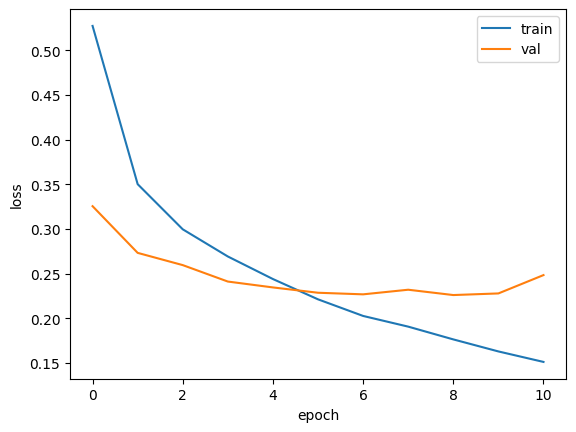

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9191 - loss: 0.2215


[0.22600264847278595, 0.9179166555404663]

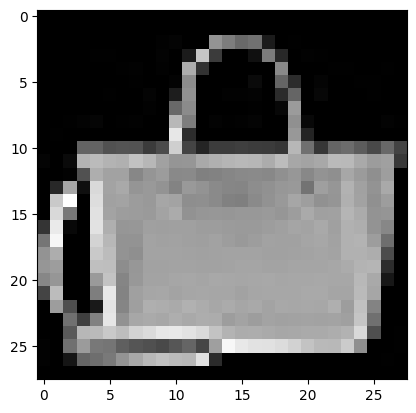

In [ ]:
# 검증세트의 첫번째 샘플로 predict()

plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray')
plt.show()

In [ ]:
# 슬라이싱 사용 주목!
# fit(), predict(), evaluate() 메소드는 모두 입력의 첫번째 차원이 batch 차원이어야 한다.
# 하나의 샘플을 전달할때에도 (28, 28, 1)  이 아니라 (1, 28, 28, 1) 이어야 한다.

preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
[[2.3464762e-19 2.1088818e-24 5.8826659e-24 1.9495593e-21 1.5805186e-21
  8.3340321e-20 2.3315411e-18 9.2160288e-21 1.0000000e+00 3.8181151e-21]]


In [ ]:
# 9번째 값만 1이고 나머지는 0에 가깝다

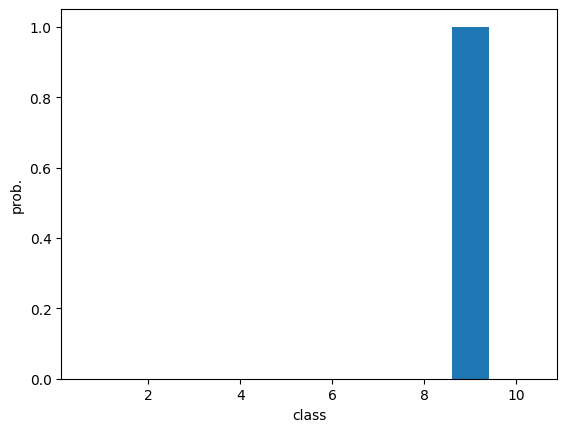

In [ ]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
# 클래스 이름들의 리스트 준비
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [ ]:
print(classes[np.argmax(preds)])

가방


In [ ]:
# (당연히!) 테스트세트토 train,val 세트에 적용한것과 동일하게 스케일링 해주어야 한다

# 훈련세트와 검증세트에 했던것처럼
# train 세트에 적용했던것처럼 '정규화' 와 shape 변경!

test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9167 - loss: 0.2629


[0.25352418422698975, 0.9156000018119812]

# 모델 저장

In [ ]:
model_save_path = 'best-cnn-model.keras'

In [ ]:
model.save(model_save_path)

# 모델 불러오기

In [ ]:
model = keras.models.load_model(model_save_path)
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9191 - loss: 0.2215


[0.22600264847278595, 0.9179166555404663]

# 실제 데이터 적용 (예측하기)

In [ ]:
base_path = r'/content/drive/MyDrive/dataset'

In [ ]:
import glob
img_paths = glob.glob(os.path.join(base_path, 'img_*.*'))
img_paths

['/content/drive/MyDrive/dataset/img_ankle_boots.jpg',
 '/content/drive/MyDrive/dataset/img_coat.jpg',
 '/content/drive/MyDrive/dataset/img_pants.png',
 '/content/drive/MyDrive/dataset/img_sandal.png',
 '/content/drive/MyDrive/dataset/img_shirt.jpg']

In [ ]:
from PIL import Image
import PIL.ImageOps as ops

In [ ]:
# 첫번째 이미지
file_path = img_paths[0]

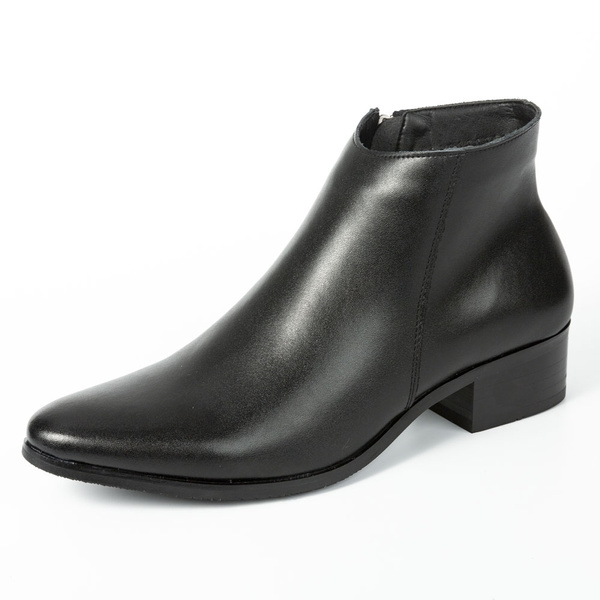

In [ ]:
img = Image.open(file_path)
img

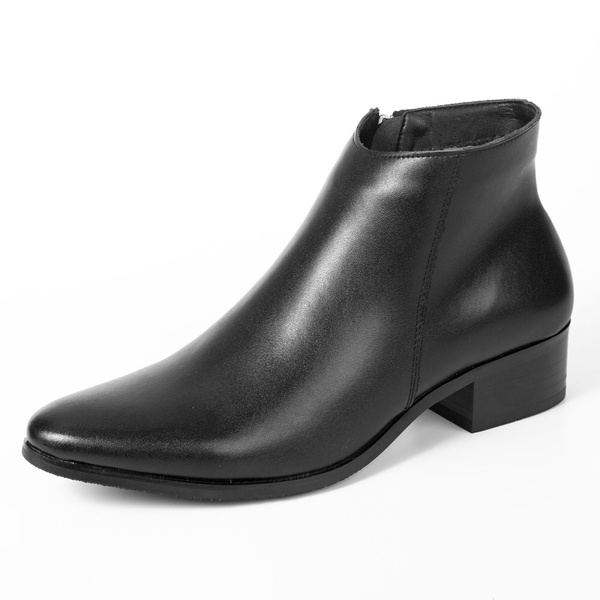

In [ ]:
mono8img = img.convert('L')
mono8img

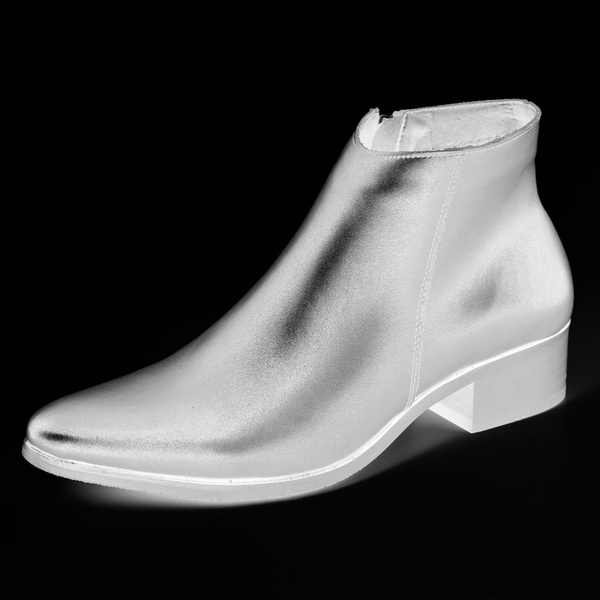

In [ ]:
invImg = ops.invert(mono8img)
invImg

In [ ]:
resizeImg = invImg.resize((28, 28))
resizeImg

In [ ]:
# 입력shape 변환(batch, height, width, channel)

data_arr = np.array(resizeImg).reshape(1, 28, 28, 1)
print(data_arr.shape)
print(np.min(data_arr), np.max(data_arr))

(1, 28, 28, 1)
0 238


In [ ]:
# scale
data_scaled = data_arr / 255.
print(np.min(data_scaled), np.max(data_scaled))

0.0 0.9333333333333333


In [ ]:
preds = model.predict(data_scaled)
print(classes[np.argmax(preds)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
앵클 부츠


In [ ]:
# 함수로 만들어 보자.
def predict(file_path):
  img = Image.open(file_path)
  mono8img = img.convert('L')
  invImg = ops.invert(mono8img)
  resizeImg = invImg.resize((28, 28))
  data_arr = np.array(resizeImg).reshape(1, 28, 28, 1)
  data_scaled = data_arr / 255.
  preds = model.predict(data_scaled)
  return classes[np.argmax(preds)]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
앵클 부츠
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
코트
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
바지
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
샌달
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
티셔츠


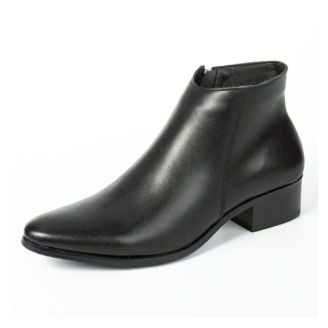

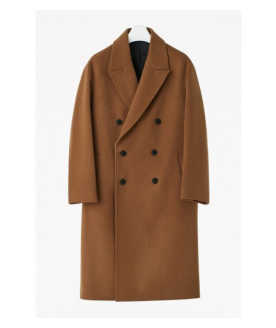

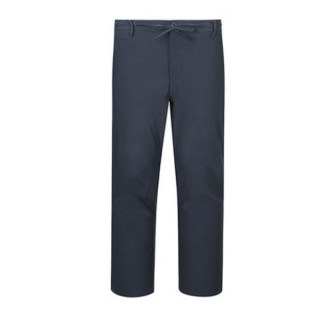

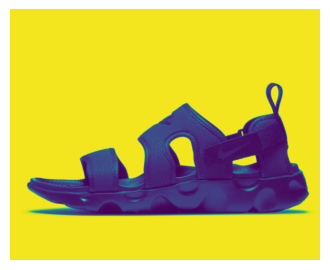

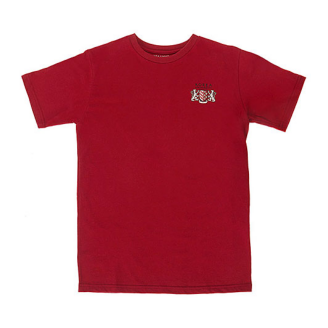

In [ ]:
for img_path in img_paths:
  fig, ax = plt.subplots(1, 1, figsize=(4,4))
  ax.axis('off')
  # ax.set_title(predict(img_path)) # colab 에서 한글 폰트 설치해야됨
  arr = plt.imread(img_path)
  plt.imshow(arr)
  print(predict(img_path))